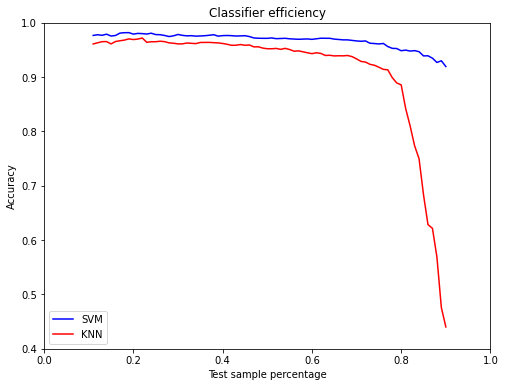

In [5]:
#################################################################################
# Непрерывная классификация. ВЫбрать датасет для классификации или              #
# распознавания образов (тоже можно интерпретировать как классификацию). Для    #
# этого датасета построить классификацию с помощью:                             #
# a) Метода опорных векторов                                                    #
# b) Метода k ближайших соседей. k подобрать экспериментально методом           #
#    "скользящего контроля".                                                    # 
# Сравнить качество получающихся классификаторов экспериментально (описать      #
# какими критериями пользовались).                                              #
#################################################################################

# Импортируем нужные библиотеки:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from pandas import DataFrame

# Загружаем набор данных Ирисы
iris = datasets.load_iris()

iris_frame = DataFrame(iris.data)

# Делаем имена колонок такие же, как имена переменных
iris_frame.columns = iris.feature_names

# Добавляем столбец с целевой переменной
iris_frame['target'] = iris.target

# Для наглядности добавляем столбец с сортами
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])

# Количество блоков в методе k-fold кросс-валидация
maxRepeatNum = 30;

# Массивы точек для вывода информации на экран
coordX_SVM = []
coordY_SVM = []
coordX_KNN = []
coordY_KNN = []

for num in range(80):
    # Контрольные суммы (оценка точности работы алгоритмов)
    qSum_SVM = 0
    qSum_KNN = 0
    
    # Повторяем несколько раз для усреднения точности
    for index in range(maxRepeatNum):
        # Создаем обучающую и проверочную выборки
        train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['sepal length (cm)',
                                                                                        'sepal width (cm)',
                                                                                        'petal length (cm)',
                                                                                        'petal width (cm)']], 
                                                                            iris_frame['target'], 
                                                                            test_size = 0.1 + 0.01 * (num + 1), 
                                                                            random_state = index)
        # Инициализация и обучение алгоритма SVM
        svm = SVC(kernel='linear', C=1.0, random_state=index)
        svm.fit(train_data, train_labels)
        
        # Инициализация и обучение алгоритма KNN
        knn = KNeighborsClassifier(n_neighbors=12, p=2, metric='minkowski')
        knn.fit(train_data, train_labels)
        
        #Суммируем точности работы алгоритмов
        qSum_SVM += metrics.accuracy_score(test_labels, svm.predict(test_data))
        qSum_KNN += metrics.accuracy_score(test_labels, knn.predict(test_data))
    
    # Добавляем новую точку в массивы
    coordX_SVM.append(0.1 + 0.01 * (num + 1))
    coordY_SVM.append(qSum_SVM / maxRepeatNum)
    coordX_KNN.append(0.1 + 0.01 * (num + 1))
    coordY_KNN.append(qSum_KNN / maxRepeatNum)

# Рисуем график зависимости эффективности алгоритма от количества соседей
plt.rcParams['figure.figsize'] = [8, 6]
plt.title('Сlassifier efficiency')
plt.axis([0, 1, 0.4, 1])
plt.ylabel('Accuracy')
plt.xlabel('Test sample percentage')
plt.plot(coordX_SVM, coordY_SVM, 'b')
plt.plot(coordX_KNN, coordY_KNN, 'r')
plt.legend(['SVM','KNN'], loc=3)
plt.show()